In [7]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import json

In [12]:
db_name = 'z:/wilding-mcbride/processing/Hela_50ug_2/Hela_50ug_2.sqlite'
db_conn = sqlite3.connect(db_name)
elution_df = pd.read_sql_query("select * from elution_profile order by frame_id", db_conn)
feature_list_df = pd.read_sql_query("select * from feature_list", db_conn)
db_conn.close()

In [13]:
# retrieve the summed frame rate
db_conn = sqlite3.connect(db_name)
df = pd.read_sql_query("select value from summing_info", db_conn)
db_conn.close()
if len(df) > 0:
    entry = json.loads(df.loc[0].value)
    frames_per_second = float(entry["frames_per_second"])
    print("Frames per second is {}".format(frames_per_second))
else:
    print("Could not find the frame rate from the summing_info table and it's needed in sebsequent steps. Exiting.")

Frames per second is 5.0


In [14]:
elution_df["retention_time_secs"] = elution_df.frame_id / frames_per_second

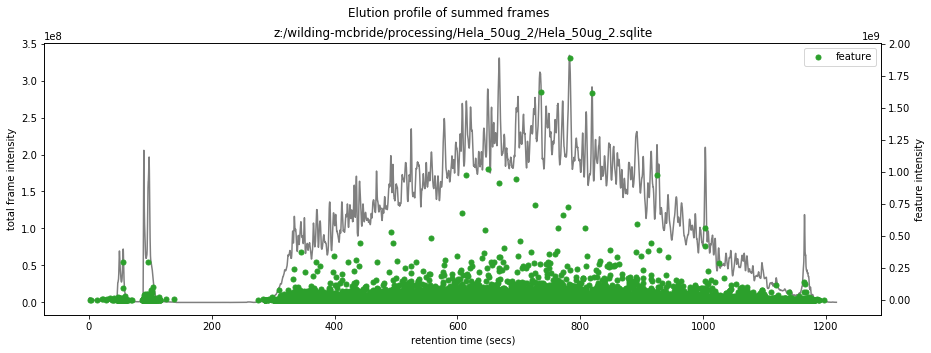

In [15]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
ax2 = ax1.twinx()
ax1.set_ylabel('total frame intensity')
ax1.set_xlabel('retention time (secs)')
ax2.set_ylabel('feature intensity')
ax2.set_xlabel('retention time (secs)')
ax1.plot(elution_df.retention_time_secs, elution_df.intensity, marker='', linestyle='-', ms=5, color='tab:gray', label='frame')
ax2.plot(feature_list_df.retention_time_secs, feature_list_df.cluster_summed_intensity, marker='o', linestyle='', ms=5, color='tab:green', label='feature')
plt.legend(loc='best')
ax2.legend(loc=0)
plt.margins(0.06)
plt.suptitle('Elution profile of summed frames')
plt.title('{}'.format(db_name))
plt.show()